<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Chemical modelling: Bjerrum plot
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss a special form to present the dissociation products
of the **carbonic acid**, the **Bjerrum plot**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geodyn_chem as chem
#help(chem)
import geodyn_div;geodyn_div.change_fonts()

When carbon dioxide CO$_2$ is dissolved in water H$_2$O, the resulting carbonic acid H$_2$CO$_3$
dissocates in two steps:
$$
\begin{array}{rcl}
\mbox{CO}_2 + \mbox{H}_2\mbox{O}
&\overset{k_1^+}{\underset{k_1^-}{\leftrightarrow}}& 
\mbox{H}^+ + \mbox{HCO}_3^- \\
\mbox{HCO}_3^-
&\overset{k_2^-}{\underset{k_2^+}{\leftrightarrow}}&
\mbox{H}^+ + \mbox{CO}_3^{2-}
\end{array}
$$

Written as differential equations, we have for the four species
$$\begin{array}{rcl}
\frac{\textrm{d}\left[\textrm{CO}_2\right]}{\textrm{d}t} &=& 
-k_1^+ \left[\textrm{CO}_2\right] 
+k_1^- \left[\textrm{H}^+\right]\left[\textrm{HCO}_3^-\right], \\
\frac{\textrm{d}\left[\textrm{H}^+\right]}{\textrm{d}t} &=& 
k_1^+ \left[\textrm{CO}_2\right] - k_1^- \left[\textrm{H}^+\right]\left[\textrm{HCO}_3^-\right] + k_2^- \left[\textrm{HCO}_3^-\right] - k_2^+ \left[\textrm{H}^+\right]\left[\textrm{CO}_3^{2-}\right], \\
\frac{\textrm{d}\left[\textrm{HCO}_3^-\right]}{\textrm{d}t} &=& 
k_1^+ \left[\textrm{CO}_2\right] - k_1^- \left[\textrm{H}^+\right]\left[\textrm{HCO}_3^-\right] 
-k_2^- \left[\textrm{HCO}_3^-\right] + k_2^+ \left[\textrm{H}^+\right]\left[\textrm{CO}_3^{2-}\right], \\
\frac{\textrm{d}\left[\textrm{CO}_3^{2-}\right]}{\textrm{d}t} &=& 
k_2^- \left[\textrm{HCO}_3^-\right] - k_2^+ \left[\textrm{H}^+\right]\left[\textrm{CO}_3^{2-}\right]
\end{array}$$
with terms in [] concentrations [mol/m$^3$], t [s] time, and the different $k_i$ rate constants.

In equilibrium, the left-hand sides are zero ($d/dt=0$), thus from equations 1 and 4, we find:
$$
K_1 = \frac{k_1^+}{k_1^-} = \frac{[\textrm{H}^+]_\text{eq}[\textrm{HCO}_3^-]_\text{eq}}{[\textrm{CO}_2]_\text{eq}}
$$
$$
K_2 = \frac{k_2^-}{k_2^+} = \frac{\left[\textrm{H}^+\right]_\text{eq}\left[\textrm{CO}_3^{2-}\right]_\text{eq}}{\left[\textrm{HCO}_3^-\right]_\text{eq}}
$$
Solving the first equation for $\left[\textrm{HCO}_3^- \right]_\text{eq}$, we find:
$$
\left[\textrm{HCO}_3^-\right]_\text{eq} = \frac{K_1\left[\textrm{CO}_2\right]_\text{eq}}{\left[\textrm{H}^+\right]_\text{eq}}
$$
Solving the second equation for $\left[\textrm{CO}_3^{2-} \right]_\text{eq}$, we find:
$$
\left[\textrm{CO}_3^{2-}\right]_\text{eq} = \frac{K_2\left[\textrm{HCO}_3^-\right]_\text{eq}}{\left[\textrm{H}^+\right]_\text{eq}} = \frac{K_1 K_2\left[\textrm{CO}_2\right]_\text{eq}}{\left[\textrm{H}^+\right]_\text{eq}^2}
$$
The total amount of carbon in the solution is given as **dissolved inorganic carbon**:
$$\begin{array}{rcl}
\textrm{DIC}
&=& 
\left[\textrm{CO}_2\right] + \left[\textrm{HCO}_3^-\right] + \left[\textrm{CO}_3^{2-}\right] \\
&=& 
\left[\textrm{CO}_2\right]_\text{eq} \left(1 + \frac{K_1}{\left[\textrm{H}^+\right]_\text{eq}} + \frac{K_1 K_2}{\left[\textrm{H}^+\right]_\text{eq}^2}\right) \\ 
&=& 
\left[\textrm{CO}_2\right]_\text{eq} \left(\frac{\left[\textrm{H}^+\right]_\text{eq}^2 + K_1\left[\textrm{H}^+\right]_\text{eq} + K_1K_2}{\left[\textrm{H}^+\right]_\text{eq}^2}\right)
\end{array}$$

Solving for CO$_2$:
$$\fbox{$
\left[\textrm{CO}_2\right]_\text{eq} = \frac{\left[\textrm{H}^+\right]_\text{eq}^2}{\left[\textrm{H}^+\right]_\text{eq}^2 + K_1\left[\textrm{H}^+\right]_\text{eq} + K_1 K_2} \textrm{DIC}
$}$$

Inserting $\left[\textrm{CO}_2\right]_\text{eq}$ into the concentations of
$\left[\textrm{HCO}_3^- \right]_\text{eq}$ and 
$\left[\textrm{CO}_3^{2-} \right]_\text{eq}$:
$$\fbox{$
\begin{array}{rcl}
\left[\textrm{HCO}_3^-\right]_\text{eq} 
= \frac{K_1\left[\textrm{H}^+\right]_\text{eq}}{\left[\textrm{H}^+\right]_\text{eq}^2 + K_1\left[\textrm{H}^+\right]_\text{eq} + K_1 K_2} \textrm{DIC} \\
\left[\textrm{CO}_3^{2-}\right]_\text{eq} 
= \frac{K_1K_2}{\left[\textrm{H}^+\right]_\text{eq}^2 + K_1\left[\textrm{H}^+\right]_\text{eq} + K_1 K_2} \textrm{DIC}
\end{array}
$}$$

Finally, we express $H^+$ as pH through
$$
pH = -\log[\textrm{H}^+]
$$

In [2]:
def bjerrum():
    # Bjerrum plot
    # calculate CO2, HCO3- and CO32- concentration as a function of pH 
    pH   = np.zeros([0,0])
    CO2  = np.zeros([0,0])
    HCO3 = np.zeros([0,0])
    CO3  = np.zeros([0,0])
    temp = 10.
    for i in np.arange(4,12,step=0.1):
        pH   = np.append(pH,i)
        H    = 10.**(-i)
        [K1,K2] = chem.K1K2(temp)
        CO2   = np.append(CO2,H**2 / (H**2 + K1*H + K1*K2))
        HCO3  = np.append(HCO3,K1*H / (H**2 + K1*H + K1*K2))
        CO3   = np.append(CO3,K1*K2 / (H**2 + K1*H + K1*K2))
    return pH,CO2,HCO3,CO3

Calculate the three species and plot them as a function of pH:

In [3]:
[pH,CO2,HCO3,CO3] = bjerrum()

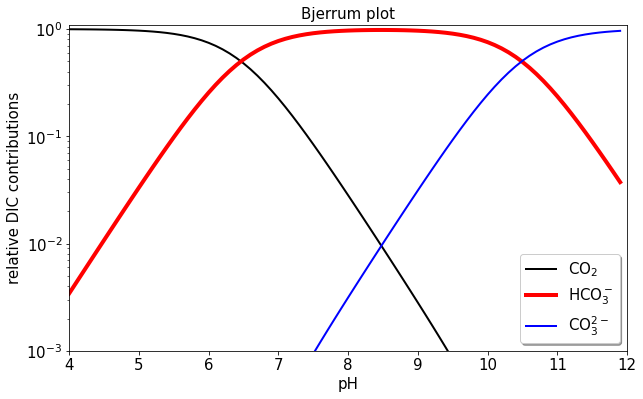

In [5]:
ax=plt.figure(figsize=(10.0, 6.0))
plt.title('Bjerrum plot')
plt.xlabel('pH')
plt.xlim([4,12])
plt.ylim([0.001,1.1])
plt.ylabel('relative DIC contributions')
plt.semilogy(pH,CO2,color='black',linestyle='solid',linewidth=2,label='CO$_2$')
plt.semilogy(pH,HCO3,color='red',linestyle='solid',linewidth=4,label='HCO$_3^-$')
plt.semilogy(pH,CO3,color='blue',linestyle='solid',linewidth=2,label='CO$_3^{2-}$')
plt.legend(loc='lower right',shadow=True)
plt.savefig('figures/CHEM_BJERRUM.png')

----
## Literature

- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO2 + H2O → H+ + HCO3− as one of the rate limiting steps for the dissolution of calcite in the system H2OCO2CaCO3**, Geochim. Cosmochim. Acta, 60(18):3375–3381
- Millero, Graham, Huang, Bustos-Serrano, Pierrot (2006). **Dissociation constants of carbonic acid in seawater as a function of salinity and temperature**,
Marine Chemistry 100(1-2):80-94.
- Schulz, Riebesell, Rost, Toms, Zeebe (2006): **Determination of the rate constants for the carbon dioxide to
bicarbonate inter-conversion in pH-buffered seawater systems**,
Marine Chemistry 100 (2006) 53–65.

----
[next>]()